# Introduction to Regression

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


### Creating sample data

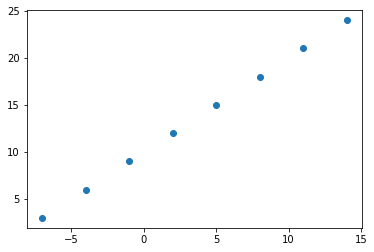

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# h(x) = x + 10
X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y);

*Input & output shapes*

In [5]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [11]:
house_info[0], house_info[0].shape

(<tf.Tensor: shape=(), dtype=string, numpy=b'bedroom'>, TensorShape([]))

In [10]:
X[0], X[0].shape

(-7.0, ())

In [6]:
input_shape = X[0].shape 
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [14]:
X, y = tf.constant(X), tf.constant(y)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Modeling

* Create model
* Compile model (define loss function & optimizer)
* Fit model (try to find patterns between X and y)

In [18]:
tf.random.set_seed(42)

# Create model with Sequential
model = tf.keras.Sequential([
    # Single feature
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float64)
      • training=True
      • mask=None


In [17]:
tf.random.set_seed(42)

# Create model with Sequential
model = tf.keras.Sequential([
    # Single feature
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 417ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
